<a href="https://colab.research.google.com/github/chicyann10/fast-stable-diffusion/blob/AI%E5%8A%A0%E5%B7%A5%E3%80%82/Sd_self_Def_Diffusers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab で動かす Stable Diffusion ( Ver2 )

Github : 
https://github.com/teftef6220/Stable_Diffusion_in_Colab

使い方 :     
簡単に ... 使いたいモデルの URL を設定して上から順番に再生ボタンを押していく。  
         詳しく ... https://note.com/te_ftef/n/nef42662c7c02


*開発へのサポート(寄付)はこちらから : https://www.buymeacoffee.com/hanying022m*

# 準備

In [ ]:
#@title mount to drive (ドライブにマウント)
from google.colab import drive
drive.mount('/content/drive')

!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

import os
os.chdir('/content')
!pwd

Mounted at /content/drive
Tesla T4, 15360 MiB, 15101 MiB
/content


In [ ]:
#@title install Riv (必要なライブラリを install )
!pip install diffusers
!pip install --upgrade diffusers[torch] transformers
!pip install safetensors
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#mkdir and download converter
#@title  変換 Scripts のダウンロード
!mkdir Models
!mkdir Scripts

import os

#def where file
Scripts_folder_name = '/content/Scripts'
Models_folder_name = '/content/Models'

# cd ./Scripts
os.chdir(Scripts_folder_name)
!pwd
# downloar kohya converter
import gdown
gdown.download('https://drive.google.com/uc?export=download&id=1B1axB5KCUHr6g2RjaazaC4LUrozND6rt','convert_diffusers20_original_sd_v4.zip', quiet=False)
! unzip convert_diffusers20_original_sd_v4.zip

# cd ./Models 
os.chdir(Models_folder_name)
!pwd

/content/Scripts


Downloading...
From: https://drive.google.com/uc?export=download&id=1B1axB5KCUHr6g2RjaazaC4LUrozND6rt
To: /content/Scripts/convert_diffusers20_original_sd_v4.zip
100%|██████████| 12.0k/12.0k [00:00<00:00, 4.83MB/s]

Archive:  convert_diffusers20_original_sd_v4.zip
  inflating: convert_diffusers20_original_sd.py  
  inflating: model_util.py           


/content/Models


In [ ]:
#@title  モデル url を入力 ＆ Drive に画像保存用フォルダを作成 

#@markdown モデルの url を入力
model_URL = "https://huggingface.co/syaimu/7th_Layer/resolve/main/7th_anime_v3/7th_anime_v3_B.safetensors" #@param {type : "string"}

#@markdown VAE入力 (モデルに対応する version を入力してください)
VAE = "Any_V4.0" #@param["SD1.5","WD1.4(V2)","Any_V4.0"] {allow-input: false}


from diffusers.models import AutoencoderKL
import torch
import glob
import os


######### Select VAE 開発中 ############
if VAE == "SD1.5":
  vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-ema",torch_dtype=torch.float32)
elif VAE == "WD1.4(V2)":
  vae = AutoencoderKL.from_pretrained("hakurei/waifu-diffusion", torch_dtype=torch.float32, subfolder="vae")
elif VAE == "Any_V4.0":
  vae = AutoencoderKL.from_pretrained("andite/anything-v4.0",torch_dtype=torch.float32,subfolder="vae")

####### モデル名を取得 #########

# get model name
model_name = os.path.splitext(os.path.basename(model_URL))[0]
print(model_name)##model_name は拡張子を抜いたファイル名

if model_name.count(".") > 0:
  model_name = model_name.split(".", 1)[0]

#model を save する dir を指定
model_dir = os.path.join(Models_folder_name , model_name) ##モデルが保存されている path
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# cd model_dir
os.chdir(model_dir)
!pwd
#############  ダウンロード  ###############

!wget {model_URL}

####### Drive に画像保存用フォルダを作成 #########

new_dir_path = '/content/drive/MyDrive/Stable_Diffusion_output'
os.makedirs(new_dir_path,exist_ok=True)

sub_dir_path = os.path.join('/content/drive/MyDrive/Stable_Diffusion_output',model_name)
os.makedirs(sub_dir_path,exist_ok=True)

print(sub_dir_path)
image_num_count=len(glob.glob(sub_dir_path+'/*.png'))
print(image_num_count)

7th_anime_v3_B
/content/Models/7th_anime_v3_B
--2023-05-25 10:27:02--  https://huggingface.co/syaimu/7th_Layer/resolve/main/7th_anime_v3/7th_anime_v3_B.safetensors
Resolving huggingface.co (huggingface.co)... 18.155.68.116, 18.155.68.38, 18.155.68.44, ...
Connecting to huggingface.co (huggingface.co)|18.155.68.116|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/0c/8c/0c8c3a139a854a317f227f1f1c2f695f4e7f15fa728359e39f1b6085d4c23d36/b000309cca90b8abac36f7ca0b21abf376cf340a59292ec994718625c22f5272?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%277th_anime_v3_B.safetensors%3B+filename%3D%227th_anime_v3_B.safetensors%22%3B&Expires=1685269623&Policy=eyJTdGF0ZW1lbnQiOlt7IlJlc291cmNlIjoiaHR0cHM6Ly9jZG4tbGZzLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzBjLzhjLzBjOGMzYTEzOWE4NTRhMzE3ZjIyN2YxZjFjMmY2OTVmNGU3ZjE1ZmE3MjgzNTllMzlmMWI2MDg1ZDRjMjNkMzYvYjAwMDMwOWNjYTkwYjhhYmFjMzZmN2NhMGIyMWFiZjM3NmNmMzQwYTU5MjkyZWM5OTQ3MTg2MjVjMjJmNTI

In [ ]:
#mkdir and download converter
#@title  converte safetensor to diffusers
import os
import subprocess

######### 変換 ##########

if VAE == "SD1.5" or VAE == "Any_V4.0":
  os.chdir(Scripts_folder_name)
  subprocess.run(['python', 'convert_diffusers20_original_sd.py', os.path.join(model_dir,os.path.basename(model_URL)), model_dir, '--v1', '--reference_model', 'runwayml/stable-diffusion-v1-5'], check=True)

########## pipeline 定義 #############

from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
# scheduler = EulerDiscreteScheduler.from_pretrained(model_dir, subfolder="scheduler")
# pipe = StableDiffusionPipeline.from_pretrained(model_dir, scheduler=scheduler, vae=vae, custom_pipeline="lpw_stable_diffusion")
pipe = StableDiffusionPipeline.from_pretrained(model_dir, vae=vae, custom_pipeline="lpw_stable_diffusion")
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:649: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


model : "7th_anime_v3_B"
VAE : "Any_V4.0"


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

saiving...output_0001~output_0004.png


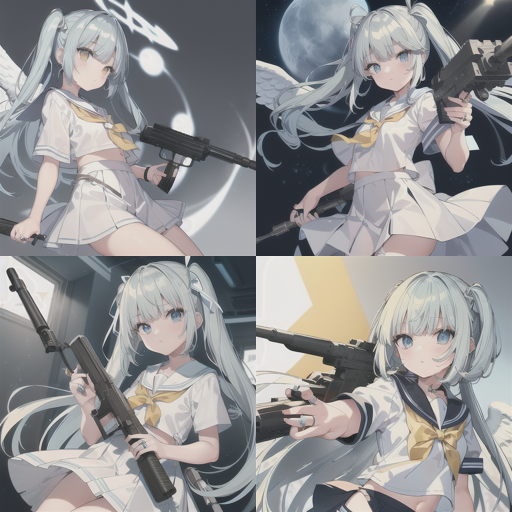

In [ ]:
#@title  同じモデル内で画像生成するときは、ここを逐一実行する(画像はGoogle Drive内にたまっていきます。StableDiffusion Output/モデル名/の中に入っています)  

#@markdown Prompt入力
prompt = "((masterpiece, best quality)),a girl,white sailor color ,(((angel ring))), school uniform,light blue ribbon,bangs,holding ((AK-47)),wepon,(machine gun),yellow ribbon,light blue hair,2 arms" #@param {type : "string"}

#@markdown Negative Prompt入力
n_prompt = "nsfw,(low quality, worst quality:1.4), (bad anatomy), (inaccurate limb:1.2),bad composition, inaccurate eyes, extra digit,fewer digits,(extra arms:1.2),hat,wings,bad guns,(bad mouth)" #@param {type : "string"}

#@markdown 横の長さ(pix)入力 (1080以上のサイズはcolabPro が必要です)
width = 512 #@param {type:"slider", min:0, max:2048, step:64}

#@markdown 縦の長さ(pix)入力 (1080以上のサイズはcolabPro が必要です)
height = 512 #@param {type:"slider", min:0, max:2048, step:64}

#@markdown cfg Scale数入力
scale = 7.0 #@param{type:"number"}

#@markdown Step数入力
steps = 32 #@param{type:"number"}

#@markdown Random Seed (-1はランダムシード)
seed_set = -1 #@param{type:"number"}

#@markdown 生成枚数 (平方数が好ましい)
num = "4" #@param[1,4,9,16]

#@markdown scheduler選択
scheduler= "EulerAncestralDiscrete" #@param ["PNDM", "DDIM", "DPMSolverMultistep", "LMSDiscrete", "EulerDiscrete", "EulerAncestralDiscrete"] {allow-input: false}

#@markdown メタデータ書き込み  (こだわらない場合はデフォルト)
how_to_embed = "Both" #@param["Default","Steganography","Both"]

import random
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import Image,display_png
from PIL import Image
from PIL.PngImagePlugin import PngInfo
from diffusers import DDIMScheduler
from diffusers import DPMSolverMultistepScheduler
from diffusers import LMSDiscreteScheduler
from diffusers import PNDMScheduler
from diffusers import EulerDiscreteScheduler
from diffusers import EulerAncestralDiscreteScheduler

def save_img(img,path,pnginfo):
  """
  save img
  """
  img.save(path,pnginfo=pnginfo)

def steganography(prompt,n_prompt,seed,img,image_save_path,metadata):
  """
  Embed prompt,n_prompt,seed, using steganography
  """
  txt=prompt+" : "+n_prompt+" : "+" seed :"+str(seed)
  # print(txt)
  rgba_img = img.convert('RGBA')
  size = rgba_img.size
  result = Image.new('RGBA',size)
  result.paste(rgba_img, (0, 0))

  flag = False
  cnt = 0
  for y in range(size[1]):
      for x in range(size[0]):

          r,g,b,a = rgba_img.getpixel((x,y))
          r = r // 3 * 3
          g = g // 4 * 4
          b = b // 5 * 5

          get_ord = ord(txt[cnt])
          #Rの処理
          # 空白 . ? 数字 a ~ g
          if get_ord == 32 or get_ord == 46 or get_ord == 63 \
              or (get_ord >= 48 and get_ord <= 57) \
              or (get_ord >= 97 and get_ord <= 103):
              r += 1
          # h ~ z or end(!)
          elif (get_ord >= 104 and get_ord <= 122) or get_ord == 33:
              r += 2
          #Gの処理
          # 2 ~ 6 m ~ q
          if (get_ord >= 50 and get_ord <= 54) \
              or (get_ord >= 109 and get_ord <= 113):
              g += 1
          # 7 ~ 9 a ~ b r ~ v
          elif (get_ord >= 55 and get_ord <= 57) \
              or get_ord == 97 or get_ord == 98 \
              or (get_ord >= 114 and get_ord <= 118):
              g += 2
          # c ~ g w ~ z
          elif (get_ord >= 99 and get_ord <= 103) \
              or (get_ord >= 119 and get_ord <= 122) \
              or get_ord == 33:
              g += 3
          #Bの処理
          if r % 3 == 1:
              # .
              if get_ord == 46: b += 1
              # ?
              elif get_ord == 63:b += 2
              # 数字
              elif (get_ord >= 48 and get_ord <= 57):
                  b += (get_ord - 45) % 5
              # a ~ g
              elif (get_ord >= 97 and get_ord <= 103):
                  b += (get_ord - 94) % 5
          elif r % 3 == 2:
              # h ~ z
              if get_ord >= 104 and get_ord <= 122:
                  b += (get_ord - 104) % 5
              # end(!)
              elif  get_ord == 33:
                  b += 4
          result.putpixel((x,y),(r,g,b,a))
          #終了処理
          if cnt == len(txt) - 1 or (r % 3 == 2 and g % 4 == 3 and b % 5 == 4):
              flag = True
              break
          if cnt < len(txt) - 1:
              cnt += 1
      if flag:
          break

  #画像の保存
  save_img(result,image_save_path,metadata)


def torch_fix_seed(Seed_TF,seed):
    # Python random
    random.seed(seed)
    # Numpy
    np.random.seed(seed)
    # Pytorch
    torch.manual_seed(seed)

    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = Seed_TF
    torch.use_deterministic_algorithms = Seed_TF



# torch.backends.cudnn.deterministic = False
# torch.use_deterministic_algorithms = False

##scheduler

if(scheduler == "PNDM"):
  pipe.scheduler = PNDMScheduler.from_config(pipe.scheduler.config)
elif(scheduler == "DDIM"):
  pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
elif(scheduler == "DPMSolverMultistep"):
  pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
elif(scheduler == "LMSDiscrete"):
  pipe.scheduler = LMSDiscreteScheduler.from_config(pipe.scheduler.config)
elif(scheduler == "EulerDiscrete"):
  pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
elif(scheduler == "EulerAncestralDiscrete"):
  pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

img_num=int(num)
images=[]
pm=1

print(f'model : "{model_name}"')
print(f'VAE : "{VAE}"')

for num in range(img_num):
  #SetSeed
  if seed_set == -1:
    seed = random.randrange(0, 4294967295, 1)
    torch_fix_seed(True,seed=seed)
  else:
    seed=seed_set
    torch_fix_seed(False,seed=seed)
  # Generate
  generator = torch.Generator("cuda").manual_seed(seed)
  tmp_img=pipe(prompt, negative_prompt=n_prompt, height=int(height), width=int(width),guidance_scale=scale, num_inference_steps=steps,).images[0]
  image_num_count+=1
  image_save_path=sub_dir_path+"/output_"+'{0:04d}'.format(image_num_count)+".png"

  if how_to_embed == "Default":
      metadata = PngInfo()
      metadata.add_text("prompt",(prompt))
      metadata.add_text("n_prompt",(n_prompt))
      metadata.add_text("seed",(str(seed)))
      save_img(tmp_img,image_save_path,metadata)
      # tmp_img.save(sub_dir_path+"/output_"+'{0:04d}'.format(image_num_count)+".png",pnginfo=metadata)
  elif how_to_embed == "Steganography" : 
      metadata=None
      steganography(prompt,n_prompt,seed,tmp_img,image_save_path,metadata)
  else:
      metadata = PngInfo()
      metadata.add_text("prompt",(prompt))
      metadata.add_text("n_prompt",(n_prompt))
      metadata.add_text("seed",(str(seed)))
      steganography(prompt,n_prompt,seed,tmp_img,image_save_path,metadata)

  images.append(tmp_img)

#make_image_tile
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    w,h=w//2,h//2
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        img = img.resize((w, h))
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

# print(images)
print("saiving..."+"output_"+'{0:04d}'.format(int(image_num_count-int(num)))+"~"+"output_"+'{0:04d}'.format(int(image_num_count))+".png")

grid = image_grid(images, rows=int(np.sqrt(img_num)), cols=int(np.sqrt(img_num)))
#show img tile
grid

# 画像生成

# メタデータ解析

In [ ]:
#@title  ファイル番号を入力 File Number (00～ではなく自然数で(Use natural Number))
from PIL import Image
#@markdown ファイル番号数入力
file_num = 1 #@param{type:"number"}

# img = Image.open(sys.argv[1])
img = Image.open(sub_dir_path+"/output_"+str(file_num).zfill(4)+".png")

print(type(img))
rgba_img = img.convert('RGBA')
size = rgba_img.size

flag = False
cnt = 0
for y in range(size[1]):
    for x in range(size[0]):

        r,g,b,a = rgba_img.getpixel((x,y))
        r = r % 3
        g = g % 4
        b = b % 5
        if r == 0:
            print(" ", end="")
        elif r == 1:
            if g == 0:
                if b == 0:
                    print(" ", end="")
                elif b == 1:
                    print(".", end="")
                elif b == 2:
                    print("?", end="")
                elif b == 3:
                    print("0", end="")
                elif b == 4:
                    print("1", end="")
            if g == 1:
                if b == 0:
                    print("2", end="")
                elif b == 1:
                    print("3", end="")
                elif b == 2:
                    print("4", end="")
                elif b == 3:
                    print("5", end="")
                elif b == 4:
                    print("6", end="")
            if g == 2:
                if b == 0:
                    print("7", end="")
                elif b == 1:
                    print("8", end="")
                elif b == 2:
                    print("9", end="")
                elif b == 3:
                    print("a", end="")
                elif b == 4:
                    print("b", end="")
            if g == 3:
                if b == 0:
                    print("c", end="")
                elif b == 1:
                    print("d", end="")
                elif b == 2:
                    print("e", end="")
                elif b == 3:
                    print("f", end="")
                elif b == 4:
                    print("g", end="")
        elif r == 2:
            if g == 0:
                if b == 0:
                    print("h", end="")
                elif b == 1:
                    print("i", end="")
                elif b == 2:
                    print("j", end="")
                elif b == 3:
                    print("k", end="")
                elif b == 4:
                    print("l", end="")
            if g == 1:
                if b == 0:
                    print("m", end="")
                elif b == 1:
                    print("n", end="")
                elif b == 2:
                    print("o", end="")
                elif b == 3:
                    print("p", end="")
                elif b == 4:
                    print("q", end="")
            if g == 2:
                if b == 0:
                    print("r", end="")
                elif b == 1:
                    print("s", end="")
                elif b == 2:
                    print("t", end="")
                elif b == 3:
                    print("u", end="")
                elif b == 4:
                    print("v", end="")
            if g == 3:
                if b == 0:
                    print("w", end="")
                elif b == 1:
                    print("x", end="")
                elif b == 2:
                    print("y", end="")
                elif b == 3:
                    print("z", end="")
                elif b == 4:
                    pass

        #終了処理
        if r == 2 and g == 3 and b == 4:
            flag = True
            print(" ")
            break
    if flag:
        break

<class 'PIL.PngImagePlugin.PngImageFile'>
  masterpiece  best quality   a girl white sailor color     angel ring     school uniform light blue ribbon bangs holding      47   wepon  machine gun  yellow ribbon light blue hair 2 arms   nsfw  low quality  worst quality 1.4    bad anatomy    inaccurate limb 1.2  bad composition  inaccurate eyes  extra digit fewer digits  extra arms 1.2  hat wings bad guns  bad mouth     seed  270519512aauaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa9aaau9auaauuuuuuuuauuuuuuuuz9t9uttth  j91 aa99t333t3.33s3332s33 3 3n 3 3    3 2    3        2                       


In [ ]:
#@title  ファイル番号を入力 File Number (00～ではなく自然数で(Use natural Number))

#@markdown ファイル番号数入力
file_num = 4 #@param{type:"number"}

import sys
from PIL import Image
from PIL.PngImagePlugin import PngInfo

# img = Image.open(sys.argv[1])
img = Image.open(sub_dir_path+"/output_"+str(file_num).zfill(4)+".png")
# print(img.text['prompt'],img.text['n_prompt'],img.text['seed'])
print("Prompt: ",img.text['prompt'])
print("Negative Prompt: ",img.text['n_prompt'])
print("seedt: ",img.text['seed'])

Prompt:  ((masterpiece, best quality)),a girl,white sailor color ,(((angel ring))), school uniform,light blue ribbon,bangs,holding ((AK-47)),wepon,(machine gun),yellow ribbon,light blue hair,2 arms
Negative Prompt:  nsfw,(low quality, worst quality:1.4), (bad anatomy), (inaccurate limb:1.2),bad composition, inaccurate eyes, extra digit,fewer digits,(extra arms:1.2),hat,wings,bad guns,(bad mouth)
seedt:  2861295861


#更新履歴

2023/05/20 : リリース 

エラー、リクエストなどありましたらteftef (@hanyingcl)まで,

https://discord.com/invite/uNW5rvDNUe ←Discord サーバー

dev. teftef,kizamimi,tonimono



[Buy Me A Coffee](https://www.buymeacoffee.com/hanying022m)

# 動作確認済みモデル

https://huggingface.co/syaimu/7th_Layer/tree/main/7th_anime_v3


https://huggingface.co/andite/anything-v4.0/tree/main

# 実験場

In [ ]:
##例

from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
from diffusers.models import AutoencoderKL
import torch
import numpy as np
from PIL import Image
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

model_id = "/content/Models/Abyss_ver3"

# vae = AutoencoderKL.from_pretrained("stabilityai/sd-vae-ft-ema")

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")

pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, vae=vae, custom_pipeline="lpw_stable_diffusion")

# #LoRAを読み込む
# pipe = load_safetensors_lora(pipe, '/content/drive/MyDrive/StableDiffusion/Lora/flat2.safetensors',alpha=-1.0) 

pipe = pipe.to("cuda")

#make_image_tile
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    w,h=w//2,h//2
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        img = img.resize((w, h))
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


prompt = "a girl"
n_prompt = "bad"
height = 512
width = 512
scale = 7.0
steps = 20

tmp_img=pipe(prompt, negative_prompt=n_prompt, height=int(height), width=int(width),guidance_scale=scale, num_inference_steps=steps,).images[0]

images_list = []
images_list.append(tmp_img)

img_num=1
grid = image_grid(images_list, rows=int(np.sqrt(img_num)), cols=int(np.sqrt(img_num)))
grid
    

Tesla T4, 15360 MiB, 8312 MiB


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:356 in load_config      │
│                                                                                                  │
│   353 │   │   else:                                                                              │
│   354 │   │   │   try:                                                                           │
│   355 │   │   │   │   # Load from URL or cache if already cached                                 │
│ ❱ 356 │   │   │   │   config_file = hf_hub_download(                                             │
│   357 │   │   │   │   │   pretrained_model_name_or_path,                                         │
│   358 │   │   │   │   │   filename=cls.config_name,                                              │
│   359 │   │   │   │   │   cache_dir=cache_dir,                                                   │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_validators.py:112 in _inner_fn    │
│                                                                                                  │
│   109 │   │   │   kwargs.items(),  # Kwargs values                                               │
│   110 │   │   ):                                                                                 │
│   111 │   │   │   if arg_name in ["repo_id", "from_id", "to_id"]:                                │
│ ❱ 112 │   │   │   │   validate_repo_id(arg_value)                                                │
│   113 │   │   │                                                                                  │
│   114 │   │   │   elif arg_name == "token" and arg_value is not None:                            │
│   115 │   │   │   │   has_token = True                                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_validators.py:160 in              │
│ validate_repo_id                                                                                 │
│                                                                                                  │
│   157 │   │   raise HFValidationError(f"Repo id must be a string, not {type(repo_id)}: '{repo_   │
│   158 │                                                                                          │
│   159 │   if repo_id.count("/") > 1:                                                             │
│ ❱ 160 │   │   raise HFValidationError(                                                           │
│   161 │   │   │   "Repo id must be in the form 'repo_name' or 'namespace/repo_name':"            │
│   162 │   │   │   f" '{repo_id}'. Use `repo_type` argument if needed."                           │
│   163 │   │   )                                                                                  │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
HFValidationError: Repo id must be in the form 'repo_name' or 'namespace/repo_name': '/content/Models/Abyss_ver3'. 
Use `repo_type` argument if needed.

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 14>:14                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/diffusers/schedulers/scheduling_utils.py:139 in          │
│ from_pretrained                                                                                  │
│                                        